# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# for looking at models r-squared, coefficients, and p-values
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
# used to change date feature
from datetime import datetime
from dateutil.parser import parse
# for stats tests
from scipy.stats import t
from scipy import stats
# used to get subset of overall dataset
from scipy.stats.mstats import winsorize
# used to get train test split for model testing
from sklearn.model_selection import train_test_split
# for feature selection
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
# for feature selection
from sklearn.feature_selection import RFECV
import warnings
warnings.filterwarnings('ignore')

# Read in Data

In [2]:
df = pd.read_csv('kc_house_data_train.csv')

# Exploratory Data Analysis 

In [3]:
# removing unnecessary column, provides no info
df = df.drop(['Unnamed: 0','id'], axis=1)
pd.options.display.max_columns = None

In [4]:
# Looking at the data itself
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [5]:
# checking to see if any major outliers
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [6]:
# looking to see if any features correlate with price
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.703540
grade            0.666215
sqft_above       0.607760
sqft_living15    0.585567
bathrooms        0.524335
view             0.395485
sqft_basement    0.323312
bedrooms         0.305106
lat              0.302394
waterfront       0.275779
floors           0.256985
yr_renovated     0.117770
sqft_lot         0.086803
sqft_lot15       0.081423
yr_built         0.056450
condition        0.036099
long             0.019327
zipcode         -0.048958
Name: price, dtype: float64

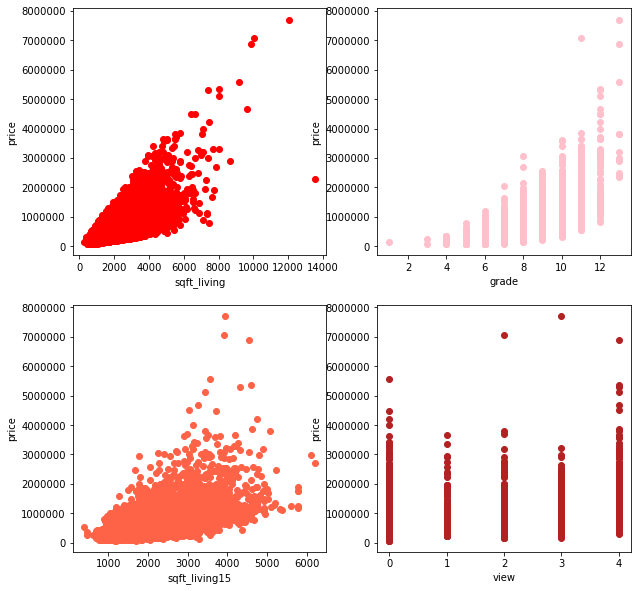

In [7]:
# looking at regression plots to see if any trends are immediatly present
x_sqft = df.sqft_living
x_grade = df.grade
x_sqft15 = df.sqft_living15
x_view = df.view
y_price_test = df.price

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].scatter(x_sqft,y_price_test,color='red')
ax[0,0].set_xlabel('sqft_living')
ax[0,0].set_ylabel('price')
ax[0,1].scatter(x_grade,y_price_test,color='pink')
ax[0,1].set_xlabel('grade')
ax[0,1].set_ylabel('price')
ax[1,0].scatter(x_sqft15,y_price_test,color='tomato')
ax[1,0].set_xlabel('sqft_living15')
ax[1,0].set_ylabel('price')
ax[1,1].scatter(x_view,y_price_test,color='firebrick')
ax[1,1].set_xlabel('view')
ax[1,1].set_ylabel('price')

fig.savefig('scatter_for_git')

In [8]:
# Left commented due to the time it takes to run this pairplot
# was very helpful to identify categorical variables
#sns.pairplot(df)

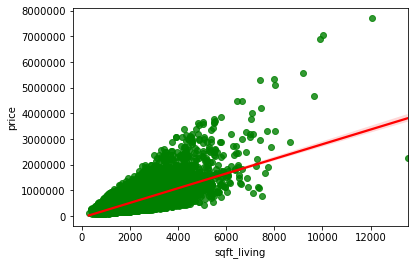

In [9]:
# regression plot to see the correlation
sns.regplot('sqft_living','price',data=df,color='green',line_kws={"color": "red"})

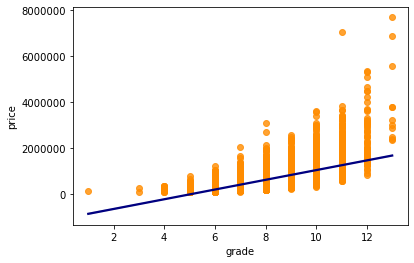

In [10]:
# regression plot to see the correlation
sns.regplot('grade','price',data=df,color='darkorange',line_kws={"color": "navy"})

# Cleaning up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [11]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [12]:
"""
OUTLIERS
- bed and bath seem to have some extreme values
- sqft has a large outlier
- sqft 15 has outlier but assuming fancy neighbor hood
"""

'\nOUTLIERS\n- bed and bath seem to have some extreme values\n- sqft has a large outlier\n- sqft 15 has outlier but assuming fancy neighbor hood\n'

In [13]:
a = np.array([10, 4, 9, 8, 5, 3, 7, 2, 1, 6])
winsorize(a, limits=[0.1, 0.1],inclusive=(False,True))

masked_array(data=[9, 4, 9, 8, 5, 3, 7, 2, 2, 6],
             mask=False,
       fill_value=999999)

# Generating New Features

First I am going to change the date column to a more usable datetime object.

### New Feature: Month Sold

Going to look to see if the month the house was sold has any affect on the price it was sold for.

In [14]:
# converting date to a real datetime
df.date = pd.to_datetime(df['date'])
# extracting just the month
df['month_sold'] = df.date.dt.month
# grouping to see price per month
selling_month = df.groupby(['month_sold']).mean()['price']

Text(0, 0.5, 'Price')

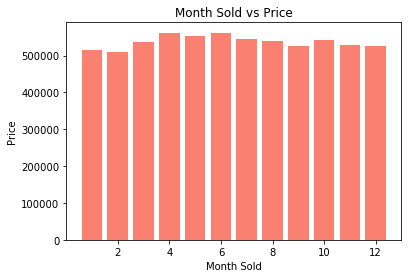

In [15]:
# quick visualization to see if anything sticks out
x = selling_month.index
y = selling_month.values
fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot()
ax.bar(x,y,color='salmon')
ax.set_title('Month Sold vs Price')
ax.set_xlabel('Month Sold')
ax.set_ylabel('Price')

From this plot we can see that there is a variation in price based on the month it was sold. The difference between the lowest and the highest is only about $6,000.

### New Feature: Year Since Renovation/Build

I wanted to look to see if the time since the house was last imporoved or built has any affect on the price of the house.

In [16]:
# using np.select to find the years since it was built or renovated
# if it was renovated
conditions = [
    df['yr_renovated'] != 0,
]
# set the years since build to 2020 - that year to get the # of years
# the data stops at 2015 but all of these will be changed so the time since does not matter
choices = [
    2020-df['yr_renovated']
]
# if not renovated defaults to the year it was built
df['yr_since_build'] = np.select(conditions,choices,default=(2020-df['yr_built']))

Text(0, 0.5, 'Price')

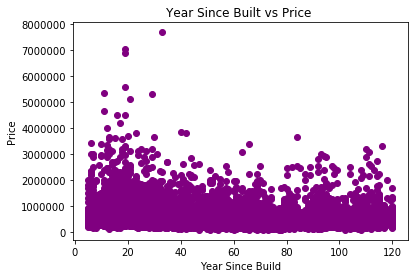

In [17]:
# using scatter to see if any trends stick out
x = df['yr_since_build']
y = df['price']
fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot()
ax.scatter(x,y,color='purple')
ax.set_title('Year Since Built vs Price ')
ax.set_xlabel('Year Since Build')
ax.set_ylabel('Price')

### New Feature: Is Multi Floor Home

This feature is going to be created because I want to see if there is any major price increase for houses that have multiple floors.

In [18]:
# looking at the counts of floors per home
df.floors.value_counts()

1.0    8606
2.0    6538
1.5    1524
3.0     475
2.5     140
3.5       7
Name: floors, dtype: int64

In [19]:
# using lambda to see if floors is greater than 1
df['is_multi_floor'] = df['floors'].apply(lambda x: 1 if x > 1 else 0)

In [20]:
# totally even split of 
df.is_multi_floor.value_counts()

1    8684
0    8606
Name: is_multi_floor, dtype: int64

In [21]:
# looking at differences in prices
df.groupby('is_multi_floor').mean()['price']

is_multi_floor
0    443405.040785
1    637199.794450
Name: price, dtype: float64

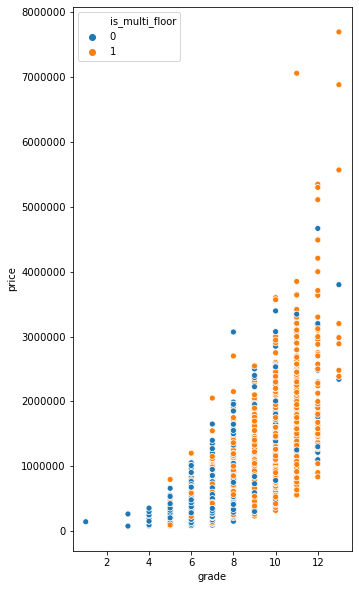

In [22]:
plt.figure(figsize=(5,10))
sns.scatterplot(df.grade,df.price,hue=df.is_multi_floor)

### New Feature: If House has new basement

In [23]:
# using lambda to see if there is a square footage for the beasement
df['has_basement'] = df['sqft_basement'].apply(lambda x: 1 if x>0 else 0)

In [24]:
# looking at counts to see the spread
df['has_basement'].value_counts()

0    10484
1     6806
Name: has_basement, dtype: int64

In [25]:
# see if the prices differ
df.groupby('has_basement').mean()['price']

has_basement
0    487510.298932
1    622734.178960
Name: price, dtype: float64

## Finalizing feature dataframe

In [26]:
features = [
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'floors',
    'waterfront',
    'view',
    'condition',
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'yr_renovated',
    'sqft_living15',
    'sqft_lot15',
    'month_sold',
    'yr_since_build',
    'is_multi_floor',
    'has_basement'
]

In [27]:
df_features = df[features]
target = df['price']

### Creating polynomial feature from the grade

Due to the look of the graph that we saw for grade, I thought that a polynomial feature could better describe that output. I was doing this manually but this will be encorporated in the larger polynomial combinations we make after.

In [28]:
# getting the data I need out
tdf = df[['price','grade']]
x = tdf.drop(columns='price',axis=1)
y = tdf['price']
print(len(x),len(y))

17290 17290


Text(0, 0.5, 'price')

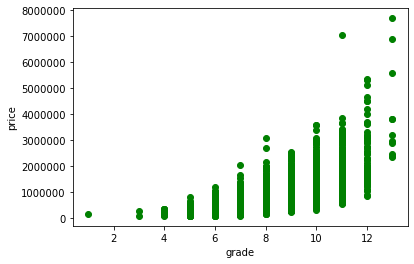

In [29]:
plt.scatter(x, y, color='green')
plt.xlabel('grade')
plt.ylabel('price')

In [30]:
from sklearn.linear_model import LinearRegression
#x.reshape(-1,1)
reg = LinearRegression().fit(x, y)

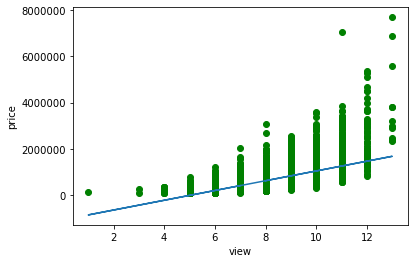

In [31]:
plt.scatter(x, y, color='green')
plt.plot(x, reg.predict(x))
plt.xlabel('view')
plt.ylabel('price');

In [32]:
x['grade_square'] = x.grade**2

In [33]:
reg = LinearRegression().fit(x, y)

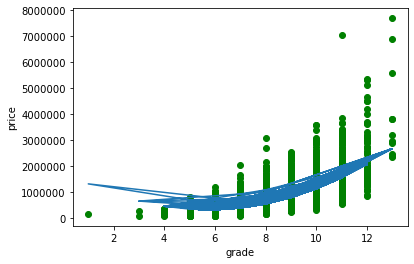

In [34]:
plt.scatter(x.grade, y, color='green')
plt.plot(x['grade'], reg.predict(x))
plt.xlabel('grade')
plt.ylabel('price');

## Making Polynomial Features

This will allow us to make combinations of all features up to a certain degree. I am going to make these now and test later.

### Creation of new dataframe for polynomials of degree 2

In [35]:
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [36]:
# instantiating the object
poly2 = PolynomialFeatures(degree=2, include_bias=False)
# transforming my features
poly2_data = poly2.fit_transform(df_features)
# creating the new data frame
poly2_cols = poly2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data,columns = poly2_cols)
df_poly2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,month_sold,yr_since_build,is_multi_floor,has_basement,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms floors,bedrooms waterfront,bedrooms view,bedrooms condition,bedrooms grade,bedrooms sqft_above,bedrooms sqft_basement,bedrooms yr_built,bedrooms yr_renovated,bedrooms sqft_living15,bedrooms sqft_lot15,bedrooms month_sold,bedrooms yr_since_build,bedrooms is_multi_floor,bedrooms has_basement,bathrooms^2,bathrooms sqft_living,bathrooms sqft_lot,bathrooms floors,bathrooms waterfront,bathrooms view,bathrooms condition,bathrooms grade,bathrooms sqft_above,bathrooms sqft_basement,bathrooms yr_built,bathrooms yr_renovated,bathrooms sqft_living15,bathrooms sqft_lot15,bathrooms month_sold,bathrooms yr_since_build,bathrooms is_multi_floor,bathrooms has_basement,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_living view,sqft_living condition,sqft_living grade,sqft_living sqft_above,sqft_living sqft_basement,sqft_living yr_built,sqft_living yr_renovated,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_living month_sold,sqft_living yr_since_build,sqft_living is_multi_floor,sqft_living has_basement,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,sqft_lot view,sqft_lot condition,sqft_lot grade,sqft_lot sqft_above,sqft_lot sqft_basement,sqft_lot yr_built,sqft_lot yr_renovated,sqft_lot sqft_living15,sqft_lot sqft_lot15,sqft_lot month_sold,sqft_lot yr_since_build,sqft_lot is_multi_floor,sqft_lot has_basement,floors^2,floors waterfront,floors view,floors condition,floors grade,floors sqft_above,floors sqft_basement,floors yr_built,floors yr_renovated,floors sqft_living15,floors sqft_lot15,floors month_sold,floors yr_since_build,floors is_multi_floor,floors has_basement,waterfront^2,waterfront view,waterfront condition,waterfront grade,waterfront sqft_above,waterfront sqft_basement,waterfront yr_built,waterfront yr_renovated,waterfront sqft_living15,waterfront sqft_lot15,waterfront month_sold,waterfront yr_since_build,waterfront is_multi_floor,waterfront has_basement,view^2,view condition,view grade,view sqft_above,view sqft_basement,view yr_built,view yr_renovated,view sqft_living15,view sqft_lot15,view month_sold,view yr_since_build,view is_multi_floor,view has_basement,condition^2,condition grade,condition sqft_above,condition sqft_basement,condition yr_built,condition yr_renovated,condition sqft_living15,condition sqft_lot15,condition month_sold,condition yr_since_build,condition is_multi_floor,condition has_basement,grade^2,grade sqft_above,grade sqft_basement,grade yr_built,grade yr_renovated,grade sqft_living15,grade sqft_lot15,grade month_sold,grade yr_since_build,grade is_multi_floor,grade has_basement,sqft_above^2,sqft_above sqft_basement,sqft_above yr_built,sqft_above yr_renovated,sqft_above sqft_living15,sqft_above sqft_lot15,sqft_above month_sold,sqft_above yr_since_build,sqft_above is_multi_floor,sqft_above has_basement,sqft_basement^2,sqft_basement yr_built,sqft_basement yr_renovated,sqft_basement sqft_living15,sqft_basement sqft_lot15,sqft_basement month_sold,sqft_basement yr_since_build,sqft_basement is_multi_floor,sqft_basement has_basement,yr_built^2,yr_built yr_renovated,yr_built sqft_living15,yr_built sqft_lot15,yr_built month_sold,yr_built yr_since_build,yr_built is_multi_floor,yr_built has_basement,yr_renovated^2,yr_renovated sqft_living15,yr_renovated sqft_lot15,yr_renovated month_sold,yr_renovated yr_since_build,yr_renovated is_multi_floor,yr_renovated has_basement,sqft_living15^2,sqft_living15 sqft_lot15,sqft_living15 month_sold,sqft_living15 yr_since_build,sqft_living15 is_multi_floor,sqft_living15 has_basement,sqft_lot15^2,sqft_lot15 month_sold,sqft_lot15 yr_since_build,sqft_lot15 is_multi_floor,sqft_lot15 has_basement,month_sold^2,month_sold yr_since_build,month_sold is_multi_floor,month_sold has_basem

In [37]:
df_poly2.shape

(17290, 209)

### Creation of new dataframe for polynomials of degree 3

In [38]:
# instantiating the object
poly3 = PolynomialFeatures(degree=3, include_bias=False)
# transforming my features
poly3_data = poly3.fit_transform(df_features)
# creating the new data frame
poly3_cols = poly3.get_feature_names(df_features.columns)
df_poly3 = pd.DataFrame(poly3_data,columns = poly3_cols)
df_poly3.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0       4.0       2.25       2070.0    8893.0     2.0         0.0   0.0   
1       5.0       3.00       2900.0    6730.0     1.0         0.0   0.0   
2       4.0       2.50       3770.0   10893.0     2.0         0.0   2.0   
3       3.0       3.50       4560.0   14608.0     2.0         0.0   2.0   
4       3.0       2.50       2550.0    5376.0     2.0         0.0   0.0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0        4.0    8.0      2070.0            0.0    1986.0           0.0   
1        5.0    8.0      1830.0         1070.0    1977.0           0.0   
2        3.0   11.0      3770.0            0.0    1997.0           0.0   
3        3.0   12.0      4560.0            0.0    1990.0           0.0   
4        3.0    9.0      2550.0            0.0    2004.0           0.0   

   sqft_living15  sqft_lot15  month_sold  yr_since_build  is_multi_floor  \
0         2390.0      7700.0        10.0            34.0             1.0   
1         2370.0      6283.0         8.0            43.0             0.0   
2         3710.0      9685.0         8.0            23.0             1.0   
3         4050.0     14226.0         3.0            30.0             1.0   
4         2250.0      4050.0         7.0            16.0             1.0   

   has_basement  bedrooms^2  bedrooms bathrooms  bedrooms sqft_living  \
0           0.0        16.0                 9.0                8280.0   
1           1.0        25.0                15.0               14500.0   
2           0.0        16.0                10.0               15080.0   
3           0.0         9.0                10.5               13680.0   
4           0.0         9.0                 7.5                7650.0   

   bedrooms sqft_lot  bedrooms floors  bedrooms waterfront  bedrooms view  \
0            35572.0              8.0                  0.0            0.0   
1            33650.0              5.0                  0.0            0.0   
2            43572.0              8.0                  0.0            8.0   
3            43824.0              6.0                  0.0            6.0   
4            16128.0              6.0                  0.0            0.0   

   bedrooms condition  bedrooms grade  bedrooms sqft_above  \
0                16.0            32.0               8280.0   
1                25.0            40.0               9150.0   
2                12.0            44.0              15080.0   
3                 9.0            36.0              13680.0   
4                 9.0            27.0               7650.0   

   bedrooms sqft_basement  bedrooms yr_built  bedrooms yr_renovated  \
0                     0.0             7944.0                    0.0   
1                  5350.0             9885.0                    0.0   
2                     0.0             7988.0                    0.0   
3                     0.0             5970.0                    0.0   
4                     0.0             6012.0                    0.0   

   bedrooms sqft_living15  bedrooms sqft_lot15  bedrooms month_sold  \
0                  9560.0              30800.0                 40.0   
1                 11850.0              31415.0                 40.0   
2                 14840.0              38740.0                 32.0   
3                 12150.0              42678.0                  9.0   
4                  6750.0              12150.0                 21.0   

   bedrooms yr_since_build  bedrooms is_multi_floor  bedrooms has_basement  \
0                    136.0                      4.0                    0.0   
1                    215.0                      0.0                    5.0   
2                     92.0                      4.0                    0.0   
3                     90.0                      3.0                    0.0   
4                     48.0                      3.0                    0.0   

   bathrooms^2  bathrooms sqft_living  bathrooms sqf

In [39]:
df_poly3.shape

(17290, 1539)

## Statistical Tests

#### Number 1
* Ho - There is no difference in price between waterfront and not
* Ha - There is a difference in price

#### Number 2
* Ho - A basement will not increase the price of a home
* Ha - A basement will increase a price of a home

#### Number 3
* Ho - a house is the same sqft as its 15 neighbors
* Ha - a house is not the same as the 15 neighbors

### Number 1

In [40]:
# going to use a two sample t-test
# getting the two samples
water = df[df['waterfront'] > 0.5]
land = df[(df.waterfront < 0.5)]
# degrees of freedom with this case
dfree = len(water) + len(land) - 1
# going for a 5% alpha with 2.5% on each side
a = 0.025
value= t.ppf(a, dfree)
print('the critical value is '+str(value))
p = t.cdf(value,dfree)
print('the p value is '+str(p))
stats.ttest_ind(water['price'], land['price'])

the critical value is -1.9601012067329433
the p value is 0.024999999999999977


Ttest_indResult(statistic=37.72330429549608, pvalue=2.465038317654299e-299)

**We can reject the null hypothesis so we can see that waterfront definitly does change the price**

### Number 2

In [41]:
basement = df[df['has_basement'] == 1]
nobase = df[df['has_basement'] == 0]
dfree = len(basement) + len(nobase) - 2
a = 0.05
value= t.ppf(a, dfree)
print('the critical value is '+str(value))
p = t.cdf(value,dfree)
print('the p value is '+str(p))
stats.ttest_ind(basement['price'], nobase['price'])


the critical value is -1.6449417719827377
the p value is 0.04999999999999998


Ttest_indResult(statistic=23.64189256331611, pvalue=1.2107663322174255e-121)

**We can reject the null hypothesis so we can see that a basement does increase the price**

### Number 3

In [42]:
# going to use a two-tailed t-test to tell if these two groups are the same or different
my_house = df.sqft_living
neighbors = df.sqft_living15

a = 0.025
dfree = len(my_house) + len(neighbors) - 2

value= t.ppf(a, dfree)
print('the critical value is '+str(value))
p = t.cdf(value,dfree)
print('the p value is '+str(p))
stats.ttest_ind(my_house, neighbors)

the critical value is -1.9600325932756502
the p value is 0.024999999999999994


Ttest_indResult(statistic=10.717152481317891, pvalue=9.316417244698597e-27)

**We can reject the null hypothesis so we can say that with 95% confidence our house is likely to be different in square footage than our neighbors.**

# Creating the Train-Test Split 

### Perform a train-test split of the data.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=9,test_size=0.2)
print(len(X_train), "train +", len(X_test), "test")

13832 train + 3458 test


### Baseline Linear Regression

In [44]:
scaler = StandardScaler()
# fit the scaler to the training data
scaler.fit(X_train)
# transforming the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns = df_features.columns)
# transforming the test data seperatley
X_test = pd.DataFrame(data=scaler.transform(X_test), columns = df_features.columns)

In [45]:
# testing this data on a linear regression
LinReg = LinearRegression()
# fitting our object to the data
LinReg = LinReg.fit(X_train,y_train)
# making predictions on our y_train
y_train_pred = LinReg.predict(X_train)
# getting the RSME
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 219031.13431092168


In [46]:
# evaluating what we have done on the test set
# using the fitted model to predict on our test (holdout)
y_test_pred = LinReg.predict(X_test)
# getting rsme
test_rmse = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
print('Testing Root Mean Squared Error:' , test_rmse)
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))                      

Testing Root Mean Squared Error: 218437.4247142999
Training:  219031 vs. Testing:  218437


## Testing polynomials of degree 2 for RSME

In [47]:
# creating a new test train split for polynomials
X_train, X_test, y_train, y_test = train_test_split(df_poly2, target, random_state=9,test_size=0.2)

In [48]:
# instantiating a scaler
scaler_p2 = StandardScaler()
# fit the scaler to the training data
scaler_p2.fit(X_train)
# transforming the training data
X_train = pd.DataFrame(data=scaler_p2.transform(X_train), columns = df_poly2.columns)
# transforming the test data seperatley
X_test = pd.DataFrame(data=scaler_p2.transform(X_test), columns = df_poly2.columns)

In [49]:
# testing this data on a linear regression
LinReg_p2 = LinearRegression()
# fitting our object to the data
LinReg_p2 = LinReg.fit(X_train,y_train)
# making predictions on our y_train
y_train_pred = LinReg_p2.predict(X_train)
# getting the RSME
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 183038.07485462967


In [50]:
# evaluating what we have done on the test set
# using the fitted model to predict on our test (holdout)
y_test_pred = LinReg_p2.predict(X_test)
# getting rsme
test_rmse = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
print('Testing Root Mean Squared Error:' , test_rmse)
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))                      

Testing Root Mean Squared Error: 186989.18889713183
Training:  183038 vs. Testing:  186989


## Testing polynomials of degree 3 for RSME

In [51]:
# creating a new test train split for polynomials
X_train, X_test, y_train, y_test = train_test_split(df_poly3, target, random_state=4,test_size=0.2)


In [52]:
# instantiating a scaler
scaler_p3 = StandardScaler()
# fit the scaler to the training data
scaler_p3.fit(X_train)
# transforming the training data
X_train = pd.DataFrame(data=scaler_p3.transform(X_train), columns = df_poly3.columns)
# transforming the test data seperatley
X_test = pd.DataFrame(data=scaler_p3.transform(X_test), columns = df_poly3.columns)

In [53]:
# testing this data on a linear regression
LinReg_p3 = LinearRegression()
# fitting our object to the data
LinReg_p3 = LinReg.fit(X_train,y_train)
# making predictions on our y_train
y_train_pred = LinReg_p3.predict(X_train)
# getting the RSME
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 151937.37487412072


In [54]:
# evaluating what we have done on the test set
# using the fitted model to predict on our test (holdout)
y_test_pred = LinReg_p3.predict(X_test)
# getting rsme
test_rmse = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
print('Testing Root Mean Squared Error:' , test_rmse)
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))                      

Testing Root Mean Squared Error: 880548.0887663994
Training:  151937 vs. Testing:  880548


This model is VERY overfit and needs to be run through a feature selection process in order to determine its usefullness.

## Feature Selection

### Filter Method Using Select K-Best

In [55]:
# using poly_2 as it was the best performing and not overfit
X_train, X_test, y_train, y_test = train_test_split(df_poly2, target, random_state=9,test_size=0.2)

\* I am using poly_2 as it performed the best after doing feature seleciton and with so many features the wrapper method took too long.

In [56]:
X_train.shape

(13832, 209)

In [57]:
# number of features I want to end with
k = round(np.sqrt(len(df_poly2)))
k

131

### f_regression as ranking method

In [111]:
# instantiating a feature selector object
feature_selector = SelectKBest(f_regression,131)
# fitting to our data
feature_selector.fit(X_train,y_train)

SelectKBest(k=131, score_func=<function f_regression at 0x7f8ca5369a60>)

In [112]:
# features that we kepy
selected_features = X_train.columns[feature_selector.get_support()]
len(selected_features)

131

In [113]:
# Test that for the regression
# instantiate a linear regression object
LR_kbest_F = LinearRegression()
# fit the linear regression to the data
LR_kbest_F = LR_kbest_F.fit(X_train[selected_features], y_train)
# predicting on the data
y_train_kbest_F = LR_kbest_F.predict(X_train[selected_features])
# getting the rsme
train_kbest_F_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest_F))
print('Training Root Mean Squared Error:' , train_kbest_F_rmse)
# predicting on test set
y_kbest_F = LR_kbest_F.predict(X_test[selected_features])
# getting RSME
test_kbest_F_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest_F))
print('Testing Root Mean Squared Error:' , test_kbest_F_rmse)

Training Root Mean Squared Error: 187932.54084415367
Testing Root Mean Squared Error: 192650.93493648892


As we can see this performed much worse than having all features did.

### Mutual Information as ranking method

In [68]:
# instantiating a feature selector object
feature_selector = SelectKBest(mutual_info_regression, k)
# fitting to our data
feature_selector.fit(X_train,y_train)

SelectKBest(k=131,
            score_func=<function mutual_info_regression at 0x7f8ca53fc1e0>)

In [69]:
# features that we kepy
selected_features_MI = X_train.columns[feature_selector.get_support()]
len(selected_features_MI)

131

In [70]:
# Test that for the regression
# instantiate a linear regression object
LinReg_kbestMI = LinearRegression()
# fit the linear regression to the data
LinReg_kbestMI = LinReg_kbestMI.fit(X_train[selected_features], y_train)
# predicting on the data
y_train_kbestMI = LinReg_kbestMI.predict(X_train[selected_features])
# getting the rsme
trainKMI_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbestMI))
print('Training Root Mean Squared Error:' , trainKMI_rmse)
# predicting on test set
y_kbestMI = LinReg_kbestMI.predict(X_test[selected_features])
# getting RSME
testKMI_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbestMI))
print('Testing Root Mean Squared Error:' , testKMI_rmse)

Training Root Mean Squared Error: 187932.54084415367
Testing Root Mean Squared Error: 192650.93493648892


### Wrapper Method

In [74]:
# importing ols model as our esimation of 'goodness'
ols = LinearRegression()
# creating a selector object
feature_selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
# fitting to our data
feature_selector.fit(X_train, y_train)

RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=-1, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [75]:
selected_wrapper = X_train.columns[feature_selector.support_]

In [115]:
len(selected_wrapper)

168

In [76]:
# Test that for the regression
# instantiate a linear regression object
LR_wrapper = LinearRegression()
# fit the linear regression to the data
LR_wrapper = LR_wrapper.fit(X_train[selected_wrapper], y_train)
# predicting on the data
y_train_wrapper = LR_wrapper.predict(X_train[selected_wrapper])
# getting the rsme
train_w_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_wrapper))
print('Training Root Mean Squared Error:' , trainW_rmse)
# predicting on test set
y_wrapper_pred = LR_wrapper.predict(X_test[selected_wrapper])
# getting RSME
test_W_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_wrapper_pred))
print('Testing Root Mean Squared Error:' , test_W_rmse)

Training Root Mean Squared Error: 184579.83454784178
Testing Root Mean Squared Error: 190233.6510557617


## Looking at which model performed the best

In [114]:
print('K-Best F-Regression RMSE:' , testKF_rmse)
print('K-Best Mutual Info RMSE:' , testKMI_rmse)
print('Wrapper RMSE:' , testW_rmse)

K-Best F-Regression RMSE: 192650.93493648892
K-Best Mutual Info RMSE: 192650.93493648892
Wrapper RMSE: 190233.6510557617


Based on these results our wrapper method performs the best.

## Refiting best model to the dataset

In [117]:
final_df = df_poly2

In [118]:
ols = LinearRegression()

feature_selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)

feature_selector.fit(df_poly2,target)

selected_features_final = final_df.columns[feature_selector.get_support()]

In [146]:
list(selected_features_final)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'sqft_living15',
 'sqft_lot15',
 'month_sold',
 'yr_since_build',
 'is_multi_floor',
 'has_basement',
 'bedrooms^2',
 'bedrooms bathrooms',
 'bedrooms sqft_living',
 'bedrooms sqft_lot',
 'bedrooms floors',
 'bedrooms waterfront',
 'bedrooms view',
 'bedrooms condition',
 'bedrooms grade',
 'bedrooms sqft_above',
 'bedrooms sqft_basement',
 'bedrooms yr_built',
 'bedrooms yr_renovated',
 'bedrooms sqft_living15',
 'bedrooms sqft_lot15',
 'bedrooms month_sold',
 'bedrooms yr_since_build',
 'bedrooms is_multi_floor',
 'bedrooms has_basement',
 'bathrooms^2',
 'bathrooms sqft_living',
 'bathrooms sqft_lot',
 'bathrooms floors',
 'bathrooms waterfront',
 'bathrooms view',
 'bathrooms condition',
 'bathrooms grade',
 'bathrooms sqft_above',
 'bathrooms sqft_basement',
 'bathrooms yr_built',
 'bathrooms yr_renovated

In [129]:
final_df.shape

(17290, 209)

In [120]:
LinReg_final = LinearRegression()
# fitting to the whole dataset
LinReg_final = LinReg_final.fit(df_poly2[selected_features_final],target)
# getting coeficients
LinReg_final.coef_

array([-1.90621465e+06, -3.30553509e+06,  5.04402885e+03, -2.48809664e+01,
       -2.86168598e+06,  5.39704645e+06, -9.37743487e+05, -7.48376204e+05,
        9.32231143e+05,  3.84947118e+03,  1.19330895e+03, -5.41121254e+04,
       -3.87555221e-02,  2.03735391e+03, -3.77514295e+01, -3.78458275e+03,
        2.70560152e+04,  7.06256133e+05, -1.59792923e+06,  8.03257363e+02,
        7.48467658e+03, -1.40572808e+01,  1.49043826e-02,  2.17520256e+04,
        2.17085058e+04, -4.99385241e+02, -2.14878623e+03, -8.11178591e+03,
        3.61558770e+00, -1.76508377e+01,  9.31333093e+02,  3.04743323e+01,
        2.10742184e+01,  1.83248191e-02, -9.53985916e+01,  1.37880937e+03,
       -7.85637041e+03,  5.93775572e+03, -5.70517560e+03,  1.17313832e+01,
       -3.52136348e-01, -2.79810357e+04,  6.26959060e+04,  7.31250724e+03,
       -2.74118099e+03,  2.22770363e+04,  1.10162961e+01,  7.16110749e-01,
        1.58623636e+03,  2.75190560e+01, -1.03570686e+01,  6.49722824e-02,
        7.88289297e+01,  

In [127]:
print ("R^2 Score:", LinReg_final.score(final_df[selected_features_final], target))

R^2 Score: 0.7592586320348474


In [132]:
y_pred_final = LinReg_final.predict(df_poly2[selected_features_final])

In [133]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 315215.2123743983
Mean Squared Error: 252483210194.35974
Root Mean Squared Error: 502477.07429728546


In [ ]:
# scaler = StandardScaler()
# # fitting and transforming to poly2 as it was best performing
# df_poly2 = pd.DataFrame(data=scaler.fit_transform(df_poly2),columns=df_poly2.columns)
# # running k-best with mutual information, k=20 produced best RMSE
# feature_selector = SelectKBest(mutual_info_regression, k)
# # fitting to the data
# feature_selector.fit(df_poly2,target)

In [ ]:
# selected_features_final = X_train.columns[feature_selector.get_support()]

In [ ]:
# len(selected_features_final)

In [ ]:
#scalar = scaler.fit_transform(df_poly2[selected_features])

In [ ]:
# # final linear regression
# LinReg_final = LinearRegression()
# # fitting to the whole dataset
# LinReg_final = LinReg_final.fit(df_poly2[selected_features_final],target)
# # getting coeficients
# LinReg_final.coef_

## Model Evaluation

In [126]:
print ("R^2 Score:", LinReg_final.score(df_poly2[selected_features_final],target))

R^2 Score: 0.7592586320348474


The R-squared seems quite good accounting for almost 76% of error.

In [88]:
#y_pred = LinReg_final.predict(df_poly2[selected_features_final])

In [140]:
#import the metrics module from sklearn
from sklearn import metrics

train_mae = metrics.mean_absolute_error(target, y_pred_final)
train_mse = metrics.mean_squared_error(target, y_pred_final)
train_rmse = np.sqrt(metrics.mean_squared_error(target, y_pred_final))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 122894.835285739
Mean Squared Error: 33549476138.33277
Root Mean Squared Error: 183165.16082031748


From this we can see that the model performed quite well.

Going to look if our residuals are evenly distributed.

In [141]:
residuals = (target - y_pred_final)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        7.000e+00, 9.000e+00, 2.100e+01, 1.800e+01, 3.900e+01, 8.000e+01,
        1.750e+02, 4.420e+02, 1.294e+03, 3.335e+03, 4.638e+03, 3.799e+03,
        2.014e+03, 6.900e+02, 2.780e+02, 1.480e+02, 8.900e+01, 5.200e+01,
        4.700e+01, 3.100e+01, 2.100e+01, 1.600e+01, 9.000e+00, 6.000e+00,
        4.000e+00, 6.000e+00, 5.000e+00, 2.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([-2033676.28233917, -1944475.92182951, -1855275.56131985,
        -1766075.20081018, -1676874.84030052, -1587674.47979086,
        -1498474.11928119, -1409273.75877153, -1320073.39826187,
        -1230873.03775221, -1141672.67724254, -1052472.31673288,
         -963271.95622322,  -874071.59571356,  -784871.23520389,
         -695670.87469423,  -606470.51418457,  -517

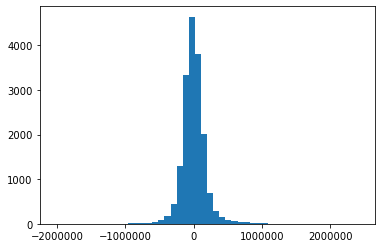

In [142]:
plt.hist(residuals,bins=50)

This does look normally distributed but the density in the middle leeds me to believe it is leptokurtic.

Looking to see if our errors are IID and homoscedastic.

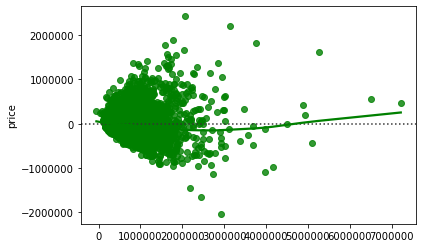

In [143]:
sns.residplot(y_pred_final, target, lowess=True, color="g")

This is somewhat concerning becuase I do see a downward trend.

## Model Interpretation

In [139]:
for item in enumerate(zip(selected_features_final,LinReg_final.coef_)):
    print('{}. {}: {}'.format(item[0]+1,item[1][0],item[1][1]))

1. bedrooms: -1906214.6473181946
2. bathrooms: -3305535.0896398188
3. sqft_living: 5044.028853071212
4. sqft_lot: -24.880966425366353
5. floors: -2861685.9771233937
6. waterfront: 5397046.445230656
7. view: -937743.4867042546
8. condition: -748376.2044246441
9. grade: 932231.1426022677
10. sqft_above: 3849.4711798158214
11. sqft_basement: 1193.3089480817216
12. yr_built: -54112.12541749034
13. yr_renovated: -0.038755522062960956
14. sqft_living15: 2037.3539054750916
15. sqft_lot15: -37.75142950863723
16. month_sold: -3784.582749119762
17. yr_since_build: 27056.01523939962
18. is_multi_floor: 706256.1332961158
19. has_basement: -1597929.2334928508
20. bedrooms^2: 803.2573632960531
21. bedrooms bathrooms: 7484.676579387267
22. bedrooms sqft_living: -14.05728080011886
23. bedrooms sqft_lot: 0.01490438260952942
24. bedrooms floors: 21752.025609613294
25. bedrooms waterfront: 21708.505804107484
26. bedrooms view: -499.38524103014686
27. bedrooms condition: -2148.786227383959
28. bedrooms gr

Looking at our selected features above we can see that there are some key feautres that played a part in the model.

`sqft_living` was part of most of the features that we ended up with and this makes a lot of sense. As a house gets bigger it is going to be more expensive. Not only does this mean that it was more expensive to build but that it most likely sits on a larger property or has multiple stories.

`bedrooms` and `bathrooms` also were a part of many of the features selected. This makes sense because as a house gets bigger and is being built to fit more people you are going to need more bedrooms and bathrooms.

`grade` was a part of many of the interactions made in the polynomial generation. This makes sense as the 'better' quality that the house is evaluated to be the more expensive it will be.

As for the coeficients we can see that some are positive and some are negative. I take this as the fine tuning that the model did to interpret how much a houses value would go up and down based on the value of that feature. Due to the scaler that we used we are evalutating these features as their affect on a house price based on standard deviations changes in the feature. 

## Pickling

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [144]:
import pickle

pickle_out = open('model.pickle','wb')
pickle.dump(LinReg_final, pickle_out)
pickle_out.close()

In [145]:
pickle_out = open('scaler.pickle','wb')
pickle.dump(scaler, pickle_out)
pickle_out.close()